In [1]:
# importing basic packages
import numpy as np 
import pandas as pd 
import datetime 
# Viz
import matplotlib.pyplot as plt 
import seaborn as sns 
import mlxtend
from mlxtend.plotting import heatmap
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the datasets
features = pd.read_csv(r'C:\Users\dheeraj kumar reddy\Downloads\Data 606 Capstone\datafiles\features.csv')
train    = pd.read_csv(r'C:\Users\dheeraj kumar reddy\Downloads\Data 606 Capstone\datafiles\train.csv')
stores   = pd.read_csv(r'C:\Users\dheeraj kumar reddy\Downloads\Data 606 Capstone\datafiles\stores.csv')

In [3]:
dfname=['features','stores','train']
dflist=[features,stores,train]
for i in range(3):
    print('--'*25)
    print(f'Dataframe {dfname[i]} has {dflist[i].shape[0]} rows and {dflist[i].shape[1]} columns.')
    print('--'*25)
    display(dflist[i].head(5))

--------------------------------------------------
Dataframe features has 8190 rows and 12 columns.
--------------------------------------------------


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------
Dataframe stores has 45 rows and 3 columns.
--------------------------------------------------


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


--------------------------------------------------
Dataframe train has 421570 rows and 5 columns.
--------------------------------------------------


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
#merging the data
df= train.merge(stores, how='left').merge(features, how='left')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week
df['Day'] = pd.to_datetime(df['Date']).dt.day
df.replace({'A': 1, 'B': 2,'C':3},inplace=True)
df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 1 if x == True else 0)
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [6]:
df.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,Day
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,1.589912,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,2010.968591,6.449510,25.826762,15.673131
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,2010.000000,1.000000,1.0,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,1.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,2010.000000,4.000000,14.0,8.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,1.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,2011.000000,6.000000,26.0,16.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,2.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,2012.000000,9.000000,38.0,23.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,3.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2012.000000,12.000000,52.0,31.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,0.666337,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.796876,3.243217,14.151887,8.753549


In [7]:
#Calculating the missing values in the dataframe
print('Percentage of the missing values.')
(100*df.isna().sum()/df.shape[0]).sort_values()

Percentage of the missing values.


Store            0.000000
Month            0.000000
Year             0.000000
Unemployment     0.000000
CPI              0.000000
Week             0.000000
Fuel_Price       0.000000
Day              0.000000
Size             0.000000
Type             0.000000
IsHoliday        0.000000
Weekly_Sales     0.000000
Date             0.000000
Dept             0.000000
Temperature      0.000000
MarkDown5       64.079038
MarkDown1       64.257181
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown2       73.611025
dtype: float64

In [8]:
#Replacing the null values in markdown columns with 0
df.iloc[:,9:14]=df.iloc[:,9:14].fillna(0)

In [9]:
print('Percentage of the missing values.')
(100*df.isna().sum()/df.shape[0]).sort_values()

Percentage of the missing values.


Store           0.0
Month           0.0
Year            0.0
Unemployment    0.0
CPI             0.0
MarkDown5       0.0
MarkDown4       0.0
MarkDown3       0.0
MarkDown2       0.0
MarkDown1       0.0
Fuel_Price      0.0
Temperature     0.0
Size            0.0
Type            0.0
IsHoliday       0.0
Weekly_Sales    0.0
Date            0.0
Dept            0.0
Week            0.0
Day             0.0
dtype: float64

In [10]:
#Creating a markdown variable in the dataframe which is equal to 1 if any of the markdown is equal to 1, otherwise 0
df['markdown'] = df.iloc[:,9:14].sum(axis=1)
df['markdown'] = df['markdown'].apply(lambda x:0 if x==0 else 1)

In [11]:
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [12]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown
0,1,1,2010-02-05,24924.50,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0
1,1,1,2010-02-12,46039.49,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0
2,1,1,2010-02-19,41595.55,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0
3,1,1,2010-02-26,19403.54,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0
4,1,1,2010-03-05,21827.90,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,2,118221,64.88,3.997,192.013558,8.684,2012,9,39,28,1
421566,45,98,2012-10-05,628.10,0,2,118221,64.89,3.985,192.170412,8.667,2012,10,40,5,1
421567,45,98,2012-10-12,1061.02,0,2,118221,54.47,4.000,192.327265,8.667,2012,10,41,12,1
421568,45,98,2012-10-19,760.01,0,2,118221,56.47,3.969,192.330854,8.667,2012,10,42,19,1


In [13]:
#Moving the target variable 'Weekly_Sales' to the end of the dataframe. It will be easy to read the corr matrix 
cols = list(df.columns)
cols.pop(cols.index('Weekly_Sales')) 
df = df[cols+['Weekly_Sales']]
df.head(5)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day,markdown,Weekly_Sales
0,1,1,2010-02-05,0,1,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,0,24924.50
1,1,1,2010-02-12,1,1,151315,38.51,2.548,211.242170,8.106,2010,2,6,12,0,46039.49
2,1,1,2010-02-19,0,1,151315,39.93,2.514,211.289143,8.106,2010,2,7,19,0,41595.55
3,1,1,2010-02-26,0,1,151315,46.63,2.561,211.319643,8.106,2010,2,8,26,0,19403.54
4,1,1,2010-03-05,0,1,151315,46.50,2.625,211.350143,8.106,2010,3,9,5,0,21827.90


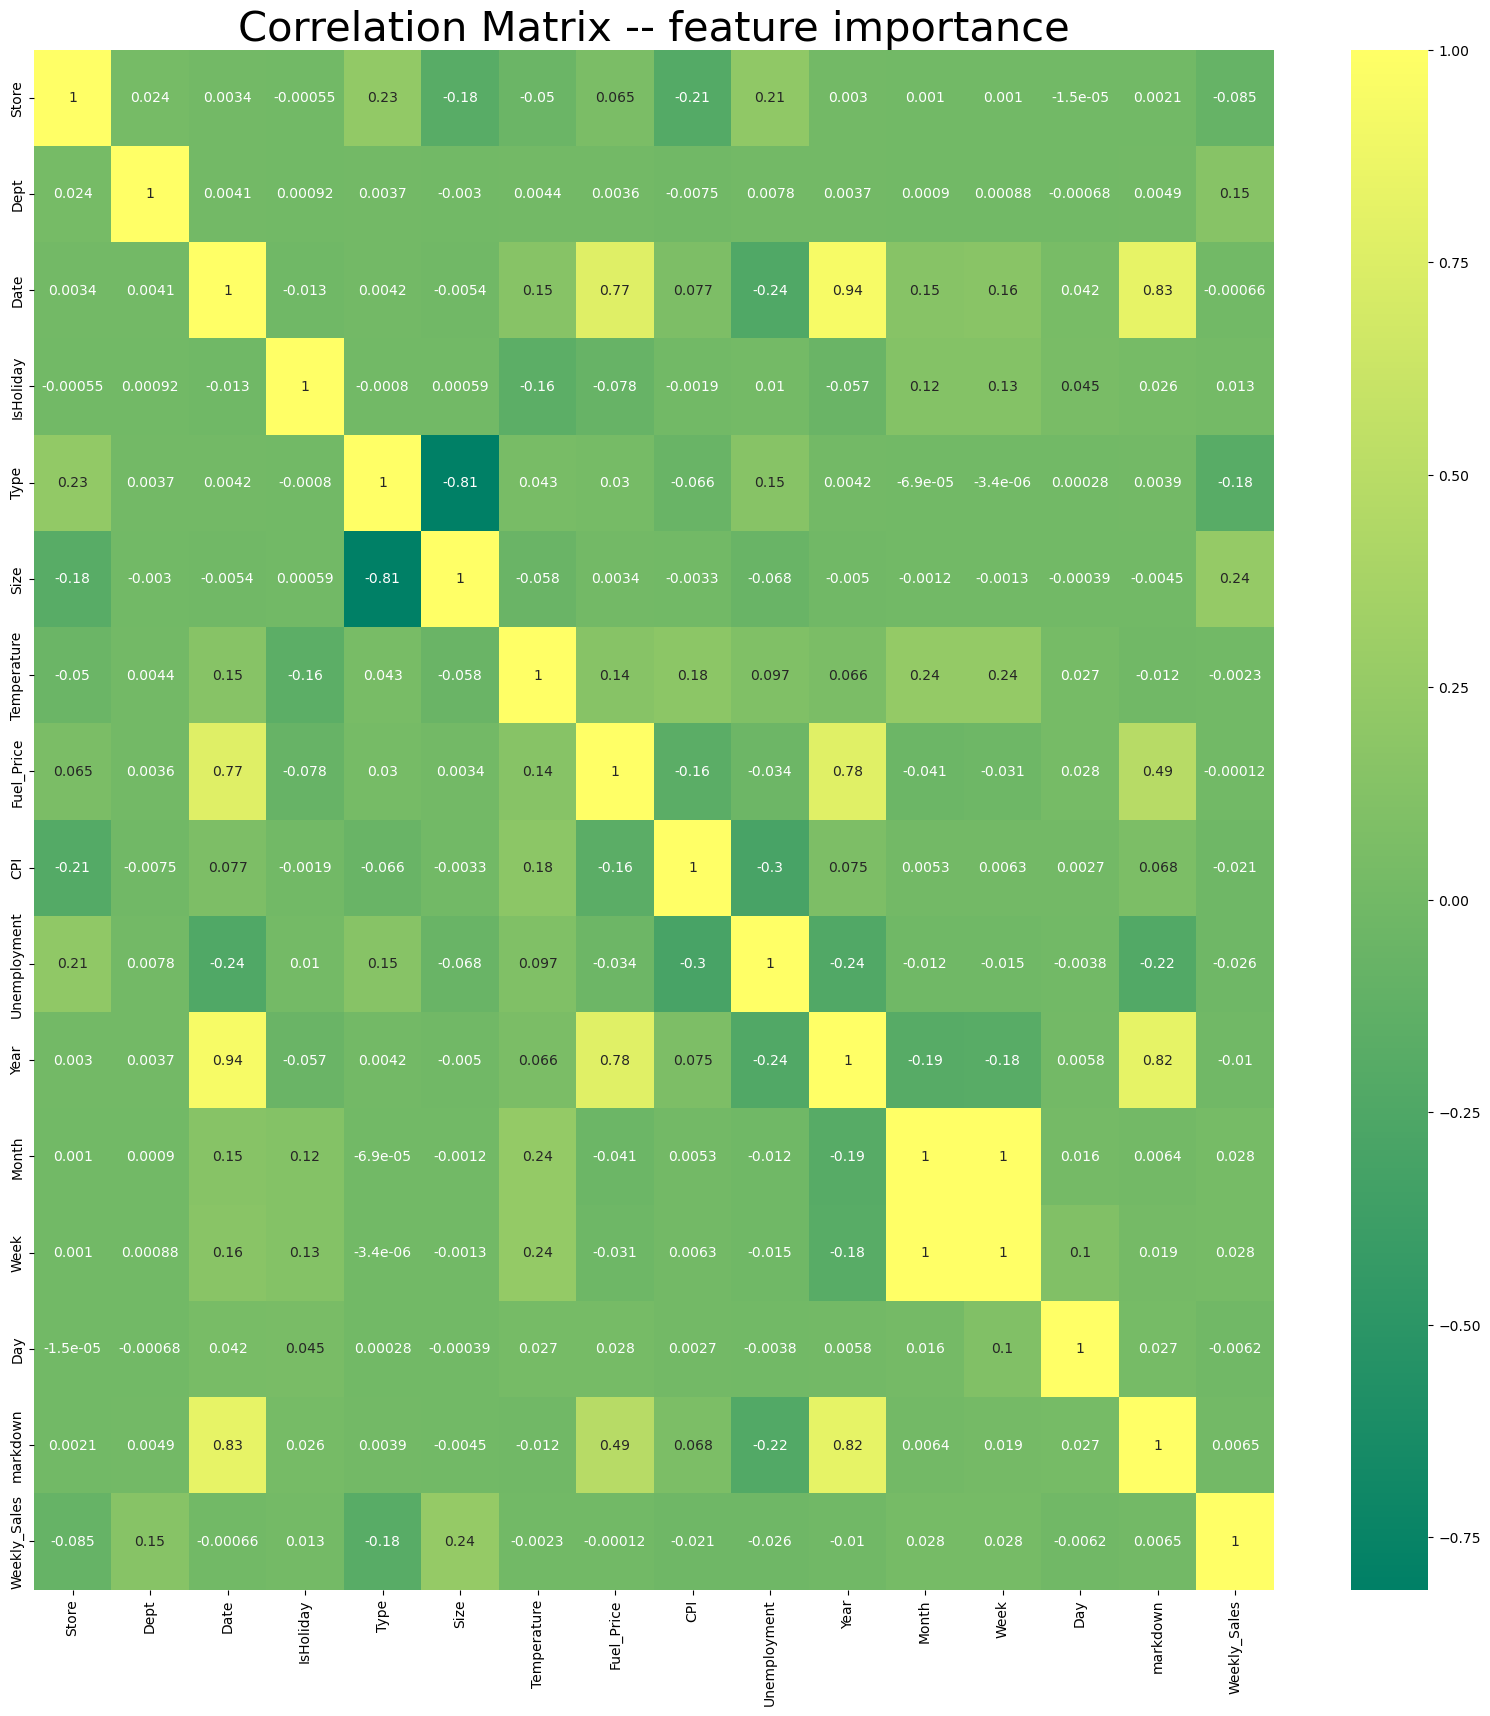

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='summer', annot=True)
plt.title('Correlation Matrix -- feature importance', fontsize=30)
plt.show()

In [15]:
from scipy.stats import spearmanr 

cols=df.columns
cols=cols.drop(['Date'])

for col in cols[:-1]:
    rho, p = spearmanr(df[col].values, df['Weekly_Sales'].values)
    print('Spearman correlation between Weekly_Sales and %s is %s' %(col, round(rho,4)))

Spearman correlation between Weekly_Sales and Store is -0.1022
Spearman correlation between Weekly_Sales and Dept is -0.0138
Spearman correlation between Weekly_Sales and IsHoliday is 0.0056
Spearman correlation between Weekly_Sales and Type is -0.2249
Spearman correlation between Weekly_Sales and Size is 0.29
Spearman correlation between Weekly_Sales and Temperature is -0.0198
Spearman correlation between Weekly_Sales and Fuel_Price is 0.002
Spearman correlation between Weekly_Sales and CPI is -0.0232
Spearman correlation between Weekly_Sales and Unemployment is -0.0165
Spearman correlation between Weekly_Sales and Year is -0.0168
Spearman correlation between Weekly_Sales and Month is 0.0239
Spearman correlation between Weekly_Sales and Week is 0.0233
Spearman correlation between Weekly_Sales and Day is -0.0044
Spearman correlation between Weekly_Sales and markdown is -0.0022


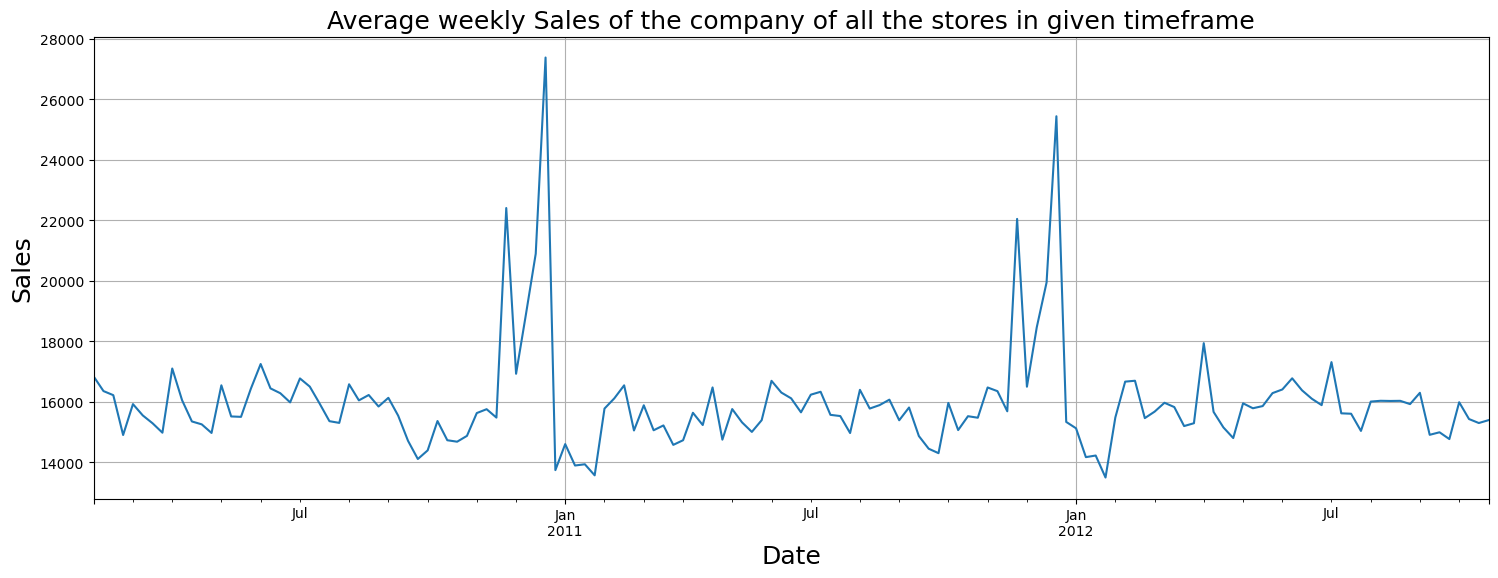

In [16]:
plt.figure(figsize=(18,6))
df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.grid()
plt.title('Average weekly Sales of the company of all the stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xlabel('Date', fontsize=18);

In [17]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=weekly_sales2010['Weekly_Sales']['mean'], label='2010')
sns.lineplot(data=weekly_sales2011['Weekly_Sales']['mean'], label='2011')
sns.lineplot(data=weekly_sales2012['Weekly_Sales']['mean'], label='2012')

plt.grid()
plt.title('Average weekly Sales by Year.', fontsize=18)
plt.xticks(np.arange(1, 53, step=1))
plt.legend()
plt.show()


NameError: name 'weekly_sales2010' is not defined

<Figure size 1500x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
df[df['Type']==1].groupby('Week').mean()['Weekly_Sales'].plot()
df[df['Type']==2].groupby('Week').mean()['Weekly_Sales'].plot()
df[df['Type']==3].groupby('Week').mean()['Weekly_Sales'].plot()
plt.grid()
plt.title('Average weekly Sales of the company by type of the store.', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Weeks', fontsize=16);

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout();

In [ ]:
def scatter(dataset, column):
    plt.figure(figsize=(15,5))
    plt.scatter(df[column] , df['Weekly_Sales'], color = 'crimson')
    plt.title('Scatter Plot of Actual Sales.', fontsize=15)
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)
    
scatter(df, 'Date')

In [ ]:
store_ids = df['Store'].unique()
store_ids

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
stores_train, stores_test = train_test_split(df['Store'].unique(), test_size=15, random_state=42)

In [ ]:
train = df[df['Store'].isin(stores_train)]
test = df[df['Store'].isin(stores_test)]

In [ ]:
lr = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False]}

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(train.drop(['Weekly_Sales', 'Date'], axis=1), train['Weekly_Sales'])
